In [33]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from scipy.stats import chi2_contingency

os.chdir('/Heart Attack Prediction Study/')
print(os.getcwd())
heartData = pd.read_csv('Dataset/heart.csv')

Desktop\Heart Attack Prediction Study
Desktop\Heart Attack Prediction Study


In [34]:
print('\nDataset: ')
print(heartData)

print('\nDataset Summary: ')
print(heartData.describe(include='all'))
print('\nDataset Sizes: ')
print(heartData.shape)

print('\nVariable Types: ')
varTypes = [str(dtype) for dtype in heartData.dtypes]
print(varTypes)

print('\nMissing Values: ')
missingValues = heartData.isnull().sum().sum()
print(missingValues)


Dataset: 
     age  sex  cp  trtbps  chol  fbs  restecg  thalachh  exng  oldpeak  slp  \
0     63    1   3     145   233    1        0       150     0      2.3    0   
1     37    1   2     130   250    0        1       187     0      3.5    0   
2     41    0   1     130   204    0        0       172     0      1.4    2   
3     56    1   1     120   236    0        1       178     0      0.8    2   
4     57    0   0     120   354    0        1       163     1      0.6    2   
..   ...  ...  ..     ...   ...  ...      ...       ...   ...      ...  ...   
298   57    0   0     140   241    0        1       123     1      0.2    1   
299   45    1   3     110   264    0        1       132     0      1.2    1   
300   68    1   0     144   193    1        1       141     0      3.4    1   
301   57    1   0     130   131    0        1       115     1      1.2    1   
302   57    0   1     130   236    0        0       174     0      0.0    1   

     caa  thall  output  
0      0      

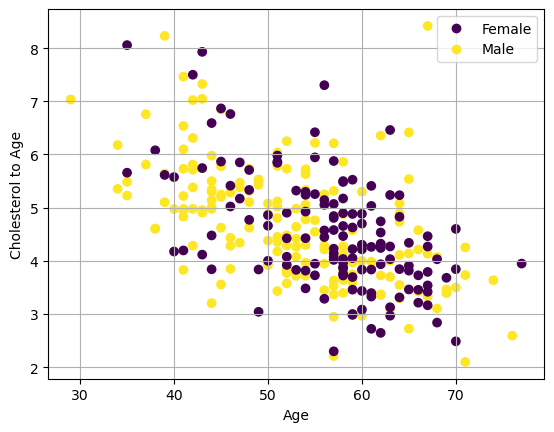

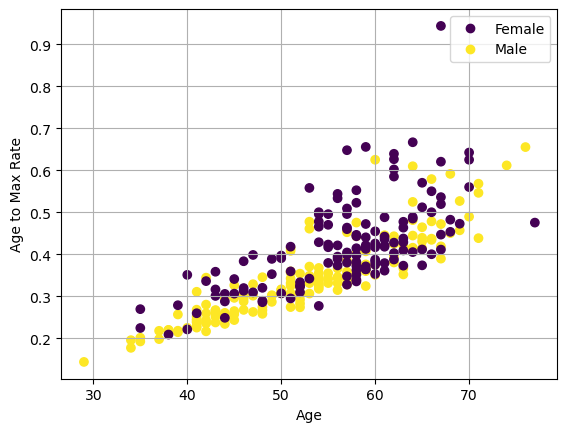

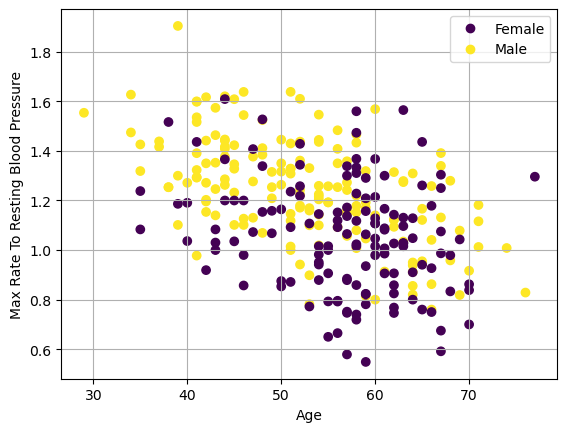

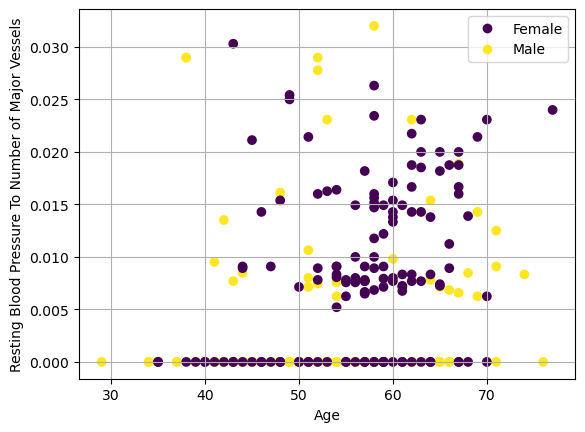

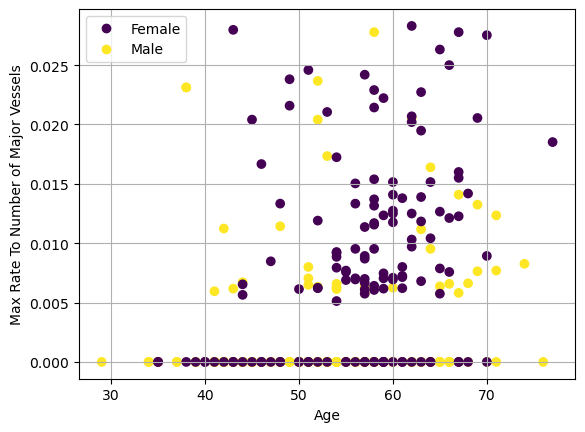

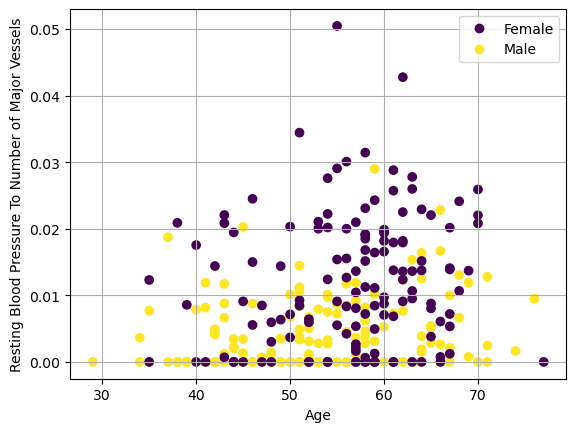

In [35]:
heartData['CholToAge'] = heartData['chol'] / heartData['age']
plot = plt.scatter(heartData['age'], heartData['CholToAge'], c=heartData['output'])
plt.legend(handles = plot.legend_elements()[0], labels=['Female', 'Male'])
plt.grid(True)
plt.xlabel("Age")
plt.ylabel("Cholesterol to Age")
plt.show()

heartData['AgeToMaxRate'] = heartData['age'] / heartData['thalachh']
plot = plt.scatter(heartData['age'], heartData['AgeToMaxRate'], c=heartData['output'])
plt.legend(handles = plot.legend_elements()[0], labels=['Female', 'Male'])
plt.grid(True)
plt.xlabel("Age")
plt.ylabel("Age to Max Rate")
plt.show()

heartData['MaxRateToResting'] = heartData['thalachh'] / heartData['trtbps']
plot = plt.scatter(heartData['age'], heartData['MaxRateToResting'], c=heartData['output'])
plt.legend(handles = plot.legend_elements()[0], labels=['Female', 'Male'])
plt.grid(True)
plt.xlabel("Age")
plt.ylabel("Max Rate To Resting Blood Pressure")
plt.show()

heartData['MajorVesselsToRestingBP'] = heartData['caa'].astype(str).astype(float) / heartData['trtbps']
plot = plt.scatter(heartData['age'], heartData['MajorVesselsToRestingBP'], c=heartData['output'])
plt.legend(handles = plot.legend_elements()[0], labels=['Female', 'Male'])
plt.grid(True)
plt.xlabel("Age")
plt.ylabel("Resting Blood Pressure To Number of Major Vessels")
plt.show()

heartData['MajorVesselsToMaxRate'] = heartData['caa'].astype(str).astype(float) / heartData['thalachh']
plot = plt.scatter(heartData['age'], heartData['MajorVesselsToMaxRate'], c=heartData['output'])
plt.legend(handles = plot.legend_elements()[0], labels=['Female', 'Male'])
plt.grid(True)
plt.xlabel("Age")
plt.ylabel("Max Rate To Number of Major Vessels")
plt.show()

heartData['STDepressionToMaxRate'] = heartData['oldpeak'] / heartData['thalachh']
plot = plt.scatter(heartData['age'], heartData['STDepressionToMaxRate'], c=heartData['output'])
plt.legend(handles = plot.legend_elements()[0], labels=['Female', 'Male'])
plt.grid(True)
plt.xlabel("Age")
plt.ylabel("Resting Blood Pressure To Number of Major Vessels")
plt.show()



['age', 'sex', 'cp', 'trtbps', 'chol', 'fbs', 'restecg', 'thalachh', 'exng', 'oldpeak', 'slp', 'caa', 'thall', 'CholToAge', 'AgeToMaxRate', 'MaxRateToResting', 'MajorVesselsToRestingBP', 'MajorVesselsToMaxRate', 'STDepressionToMaxRate', 'output']


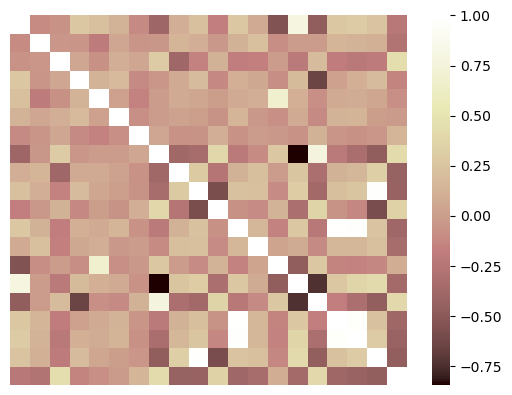

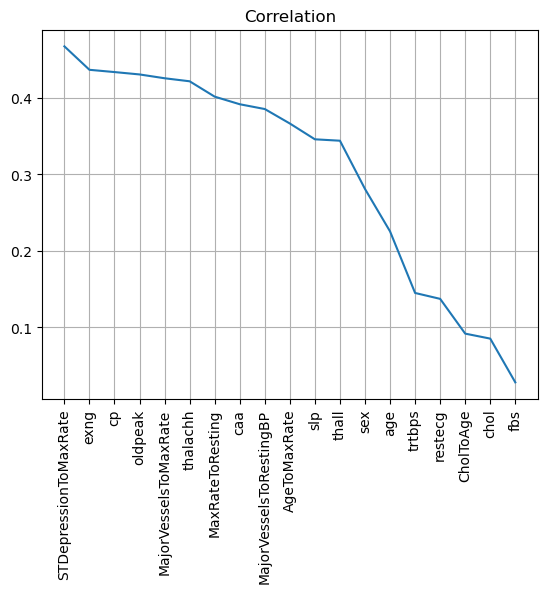

In [36]:
cols = list(heartData.columns)
cols.remove('output')
position = cols.index('STDepressionToMaxRate')
cols.insert(position + 1, 'output')
heartData = heartData[cols]

heartDataArray = heartData.to_numpy()
corrCoefMatrix = np.corrcoef(heartDataArray, rowvar=False)

heartData = heartData[cols]
cols = list(heartData.columns)
print(cols)

outputCorrelationVector = np.abs(corrCoefMatrix[:, -1])

idx = np.argsort(outputCorrelationVector)[::-1]
featImpCorelation = outputCorrelationVector[idx]

featImpLabelsbyCorrelation = np.array(heartData.columns)[idx]

featImpLabelsbyCorrelation = featImpLabelsbyCorrelation[1:]
featImpCorelation = featImpCorelation[1:]

# Visualize the results
# 1. Correlation Matrix Visualization
plt.figure()
sns.heatmap(corrCoefMatrix, cmap='pink')
plt.axis('off')
plt.show()

# 2. Output Correlation Array
plt.figure()
plt.title("Correlation")
plt.plot(featImpCorelation)
plt.xticks(ticks=np.arange(len(featImpCorelation)), labels=featImpLabelsbyCorrelation, rotation=90)
plt.grid(True)
plt.show()

In [37]:
heartData_Response = heartData['output']
heartData_Predictors = heartData.drop(columns='output')

nTrees = 100
rf = RandomForestClassifier(n_estimators=nTrees, oob_score=True)
rf.fit(heartData_Predictors, heartData_Response)

# Feature importance
importance = rf.feature_importances_

idx = np.argsort(importance)[::-1]

print("\nFeature importance:")
featImpLabelsbyTreeBagger = []
for i in range(heartData_Predictors.shape[1]):
    ii = idx[i]
    column_name = heartData_Predictors.columns[ii]
    print(f'{column_name}: {importance[ii]}')
    featImpLabelsbyTreeBagger.append(column_name)


Feature importance:
cp: 0.10823835354951294
STDepressionToMaxRate: 0.0870612337543463
thalachh: 0.08001820439699472
thall: 0.07801463403073906
AgeToMaxRate: 0.06851514606371321
MajorVesselsToRestingBP: 0.06333363951664911
MaxRateToResting: 0.0632889519208208
caa: 0.060868310207002875
MajorVesselsToMaxRate: 0.059440459818902065
oldpeak: 0.05867780048980551
CholToAge: 0.04688722459586228
age: 0.04659097681311759
chol: 0.040504271560406854
trtbps: 0.040000260697885134
exng: 0.03472243391758747
slp: 0.024203166253831697
sex: 0.022713753024739766
restecg: 0.012219587593859903
fbs: 0.004701591794222707


In [44]:
import pandas as pd
from scipy.stats import chi2_contingency

pValues = []
featImpLabelsbypVals = list(heartData.columns)

for varName in heartData.columns:
    contingency = pd.crosstab(heartData['output'], heartData[varName])
    chi2, pVal, _, _ = chi2_contingency(contingency)
    # print(f"{varName} - {pVal:.4f}")
    pValues.append(pVal)

featImp_pValuesOrdered, featImpLabelsbypVals = zip(*sorted(zip(pValues, featImpLabelsbypVals)))

featImp_pValuesOrdered = list(featImp_pValuesOrdered)
featImpLabelsbypVals = list(featImpLabelsbypVals)

print(featImpLabelsbypVals)

output_index = featImpLabelsbypVals.index('output')
del featImp_pValuesOrdered[output_index]
del featImpLabelsbypVals[output_index]


['output', 'thall', 'cp', 'caa', 'exng', 'slp', 'sex', 'oldpeak', 'MajorVesselsToRestingBP', 'MajorVesselsToMaxRate', 'restecg', 'STDepressionToMaxRate', 'thalachh', 'chol', 'age', 'MaxRateToResting', 'AgeToMaxRate', 'trtbps', 'CholToAge', 'fbs']
